# Plot

## Heatmap
A heatmap can be used to show relative abundances oftaxa in samples or groups of samples. The **plot.heatmap** function can be used like this.

In [1]:
import qdiv
obj = qdiv.MicrobiomeData.load_example("Saheb-Alam_DADA2") #First we load example data
obj.rename_features(inplace=True, name_type="ASV") #This is the name the features ASV1, ASV2
obj.tax_prefix(add=True, inplace=True) #This is to add prefix to the taxonomic classified, i.e., d__ for domain, p__ for phylum, etc.
print(obj.meta) #Let's have a look at the meta data before plotting the heatmap

       location     feed mfc
sample                      
S4        anode  acetate   B
S5        anode  acetate   B
S6        anode  acetate   B
S7        anode  acetate   B
S10     cathode  acetate   B
S11     cathode  acetate   B
S12     cathode  acetate   B
S13     cathode  acetate   B
S20       anode  glucose   D
S21       anode  glucose   D
S22       anode  glucose   D
S23       anode  glucose   D
S26     cathode  glucose   D
S27     cathode  glucose   D
S28     cathode  glucose   D
S29     cathode  glucose   D


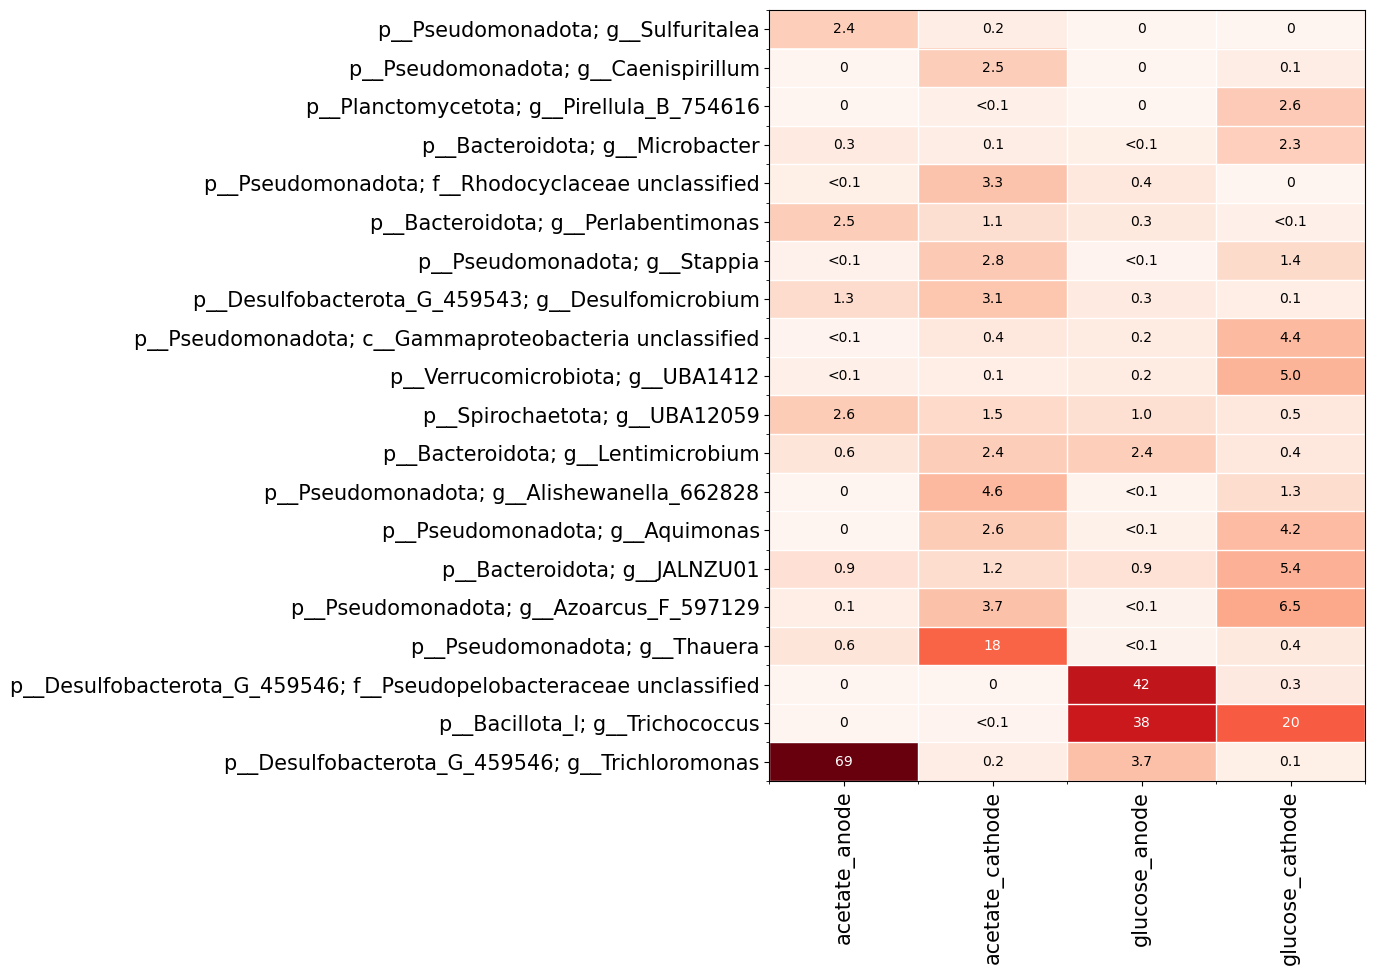

In [2]:
fig, ax, data = qdiv.plot.heatmap(obj, group_by=["feed", "location"], levels=["Phylum", "Genus"])

Here I chose to group the samples based on the meta data columns 'feed' and 'location'. I also specified that I want to show phylum and genus levels on the y-axis. The features are grouped based on the lowest taxonomic level chosen (i.e. genus in this case).

## Alpha diversity profiles
The **plot.alpha_diversity_profile** function let's us visualize how alpha diversity depends on diversity order.

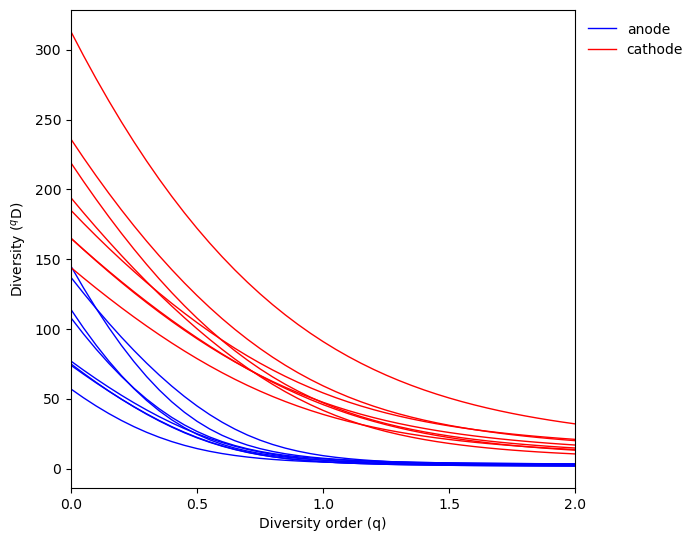

In [3]:
import qdiv
obj = qdiv.MicrobiomeData.load_example("Saheb-Alam_DADA2")
obj.rename_features(inplace=True, name_type="ASV") #This is the name the features ASV1, ASV2
obj.tax_prefix(add=True, inplace=True) #This is to add prefix to the taxonomic classified, i.e., d__ for domain, p__ for phylum, etc.
obj.rarefy(inplace=True) #Rarefy to make comparison of alpha diversity between samples easier
fig, ax, data = qdiv.plot.alpha_diversity_profile(obj, color_by="location")

Here we can see the cathode samples tend to have higher diversity than anode samples for all diversity orders.

## Beta diversity
Similarities and differences in community composition between samples if often visualized using an ordination. First, we calculate pairwise dissimilarities between samples using the **diversity.naive_beta** function.

In [4]:
import qdiv
obj = qdiv.MicrobiomeData.load_example("Saheb-Alam_DADA2")
obj.rename_features(inplace=True, name_type="ASV") #This is the name the features ASV1, ASV2
obj.tax_prefix(add=True, inplace=True) #This is to add prefix to the taxonomic classified, i.e., d__ for domain, p__ for phylum, etc.
obj.rarefy(inplace=True)

dis = qdiv.diversity.naive_beta(obj, q=1) #Here I calculate for q=1

Next, we plot a principal coordinate analysis using the **plot.ordination** function.

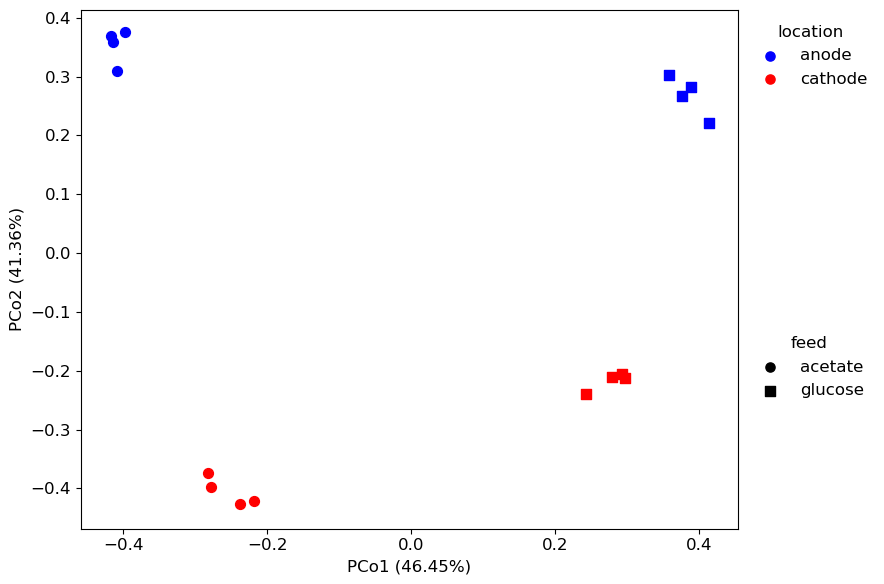

In [10]:
fig, ax, data1, data2 = qdiv.plot.ordination(dis, obj, color_by="location", shape_by="feed")